# LOAN PREDICTION USING MACHINE LEARNING
Banks are making major part of profits through loans. Though lot of people are applying for loans. It’s hard to select the genuine applicant, who will repay the loan. While doing the process manually, lot of misconception may happen to select the genuine applicant.

Therefore, developing loan prediction system using machine learning, so the system automatically selects the eligible candidates. This is helpful to both bank staff and applicant. The time period for the sanction of loan will be drastically reduced. In this project we are predicting the loan data by using some machine learning algorithms.

# AIM :
To build a model that can predict whether the loan of the applicant will be approved or not on the basis of the details provided in the dataset.

# Hypothesis Generation
Hypothesis Generation is the process of listing out all the possible factors that can affect the outcome i.e. which of the features will have an impact on whether a loan will be approved or not. Some of the hypothesis are:

Education - Applicants with higher education level i.e. graduate level should have higher chances of loan approval
Income: Applicants with higher income should have more chances of loan approval
Loan amount: If the loan amount is less, the chances of loan approval should be high
Loan term: Loans with shorter time period should have higher chances of approval
Previous credit history: Applicants who have repayed their previous debts should have higher chances of loan approval
Monthly installment amount: If the monthly installment amount is low, the chances of loan approval should be high
And so on
Some of the hypothesis seem intuitive while others may not. We will try to validate each of these hypothesis based on the dataset.

# importing essential libraries

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

# reading csv file

In [3]:
dataLoanApp=pd.read_csv('https://raw.githubusercontent.com/dsrscientist/DSData/master/loan_prediction.csv')

In [4]:
dataLoanApp.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


# Obtaining the dimensions of dataset

In [5]:
dataLoanApp.shape

(614, 13)

# Gives informaton of the dataset it's type etc

In [ ]:
dataLoanApp.info()

Note: There are 3 data types in the data

object: Object format means variables are categorical. Categorical variables in our dataset are: Loan_ID, Gender, Married, Dependents, Education, Self_Employed, Property_Area, Loan_Status

int64: It represents the integer variables. ApplicantIncome is of this format.

float64: It represents the variable which have some decimal values involved. They are also numerical variables. Numerical variables in our dataset are: CoapplicantIncome, LoanAmount, Loan_Amount_Term, and Credit_History

Why Data Types are important?

Datatypes are an important concept because statistical methods can only be used with certain data types. You have to analyze continuous data differently than categorical data otherwise it would result in a wrong analysis. Therefore knowing the types of data you are dealing with, enables you to choose the correct method of analysis

# Checking null values

In [7]:
dataLoanApp.isna().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [8]:
#Total null values present
dataLoanApp.isna().sum().sum()

149

In [9]:
#Difference in dataset on removal of null basically size
dataLoanApp.shape[0] - dataLoanApp.dropna().shape[0]


134

# Filling Missing Values

In [10]:
dataLoanApp['Gender'].fillna(dataLoanApp['Gender'].mode()[0], inplace=True)
dataLoanApp['Married'].fillna(dataLoanApp['Married'].mode()[0], inplace=True)
dataLoanApp['Dependents'].fillna(dataLoanApp['Dependents'].mode()[0], inplace=True)
dataLoanApp['Self_Employed'].fillna(dataLoanApp['Self_Employed'].mode()[0], inplace=True)
dataLoanApp['LoanAmount'].fillna(dataLoanApp['LoanAmount'].mean(), inplace=True)
dataLoanApp['Loan_Amount_Term'].fillna(dataLoanApp['Loan_Amount_Term'].mode()[0], inplace=True)
dataLoanApp['Credit_History'].fillna(dataLoanApp['Credit_History'].mode()[0], inplace=True)

Missing value and outlier treatment

After exploring all the variables in our data, we can now impute the missing values and treat the outliers because missing data and outliers can have adverse effect on the model performance.

There are missing values in Gender, Married, Dependents, Self_Employed, LoanAmount, Loan_Amount_Term and Credit_History features. We will treat the missing values in all the features one by one.

We can consider these methods to fill the missing values:

For numerical variables: imputation using mean or median
For categorical variables: imputation using mode
There are very less missing values in Gender, Married, Dependents, Credit_History and Self_Employed features so we can fill them using the mode of the features. If an independent variable in our dataset has huge amount of missing data e.g. 80% missing values in it, then we would drop the variable from the dataset.

Now we will see the LoanAmount variable. As it is a numerical variable, we can use mean or median to impute the missing values. We will use median to fill the null values as earlier we saw that loan amount have outliers so the mean will not be the proper approach as it is highly affected by the presence of outliers.

 We need to replace the missing values in Test set using the mode/median/mean of the Training set, not from the Test set. Likewise, if you remove values above some threshold in the test case, make sure that the threshold is derived from the training and not test set. Make sure to calculate the mean (or any other metrics) only on the train data to avoid data leakage to your test set.

In [11]:
dataLoanApp.isna().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [12]:
dataLoanApp

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.000000,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.000000,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.000000,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.000000,360.0,1.0,Urban,Y


# Missing value check

In [13]:
missing_value=dataLoanApp.isna().sum()
percentage_missing=(missing_value/len(dataLoanApp))*100
percentage_missing

Loan_ID              0.0
Gender               0.0
Married              0.0
Dependents           0.0
Education            0.0
Self_Employed        0.0
ApplicantIncome      0.0
CoapplicantIncome    0.0
LoanAmount           0.0
Loan_Amount_Term     0.0
Credit_History       0.0
Property_Area        0.0
Loan_Status          0.0
dtype: float64

In [14]:
dataLoanApp.sample(10)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
590,LP002928,Male,Yes,0,Graduate,No,3000,3416.0,56.000000,180.0,1.0,Semiurban,Y
406,LP002308,Male,Yes,0,Not Graduate,No,2167,2400.0,115.000000,360.0,1.0,Urban,Y
24,LP001052,Male,Yes,1,Graduate,No,3717,2925.0,151.000000,360.0,1.0,Semiurban,N
190,LP001653,Male,No,0,Not Graduate,No,4885,0.0,48.000000,360.0,1.0,Rural,Y
359,LP002160,Male,Yes,3+,Graduate,No,5167,3167.0,200.000000,360.0,1.0,Semiurban,Y
47,LP001144,Male,Yes,0,Graduate,No,5821,0.0,144.000000,360.0,1.0,Urban,Y
442,LP002418,Male,No,3+,Not Graduate,No,4707,1993.0,148.000000,360.0,1.0,Semiurban,Y
247,LP001819,Male,Yes,1,Not Graduate,No,6608,0.0,137.000000,180.0,1.0,Urban,Y
387,LP002243,Male,Yes,0,Not Graduate,No,3010,3136.0,146.412162,360.0,0.0,Urban,N
55,LP001194,Male,Yes,2,Graduate,No,2708,1167.0,97.000000,360.0,1.0,Semiurban,Y


# Encoding categorical data

In [15]:
dataLoanApp['Dependents']= dataLoanApp['Dependents'].replace(to_replace='3+',value='4')

In [16]:
dataLoanApp['Dependents'].unique()

array(['0', '1', '2', '4'], dtype=object)

In [17]:
dataLoanApp['Gender']= dataLoanApp['Gender'].map({'Male':1,'Female':0}).astype('int')

In [18]:
dataLoanApp['Gender'].unique()

array([1, 0])

In [19]:
dataLoanApp['Married']=dataLoanApp['Married'].map({'Yes':1,'No':0}).astype('int')

In [20]:
dataLoanApp['Married'].unique()

array([0, 1])

In [21]:
dataLoanApp['Education'].unique()

array(['Graduate', 'Not Graduate'], dtype=object)

In [22]:
dataLoanApp['Education']=dataLoanApp['Education'].map({'Graduate':1,'Not Graduate':0}).astype('int')

In [23]:
dataLoanApp['Education'].unique()

array([1, 0])

In [24]:
dataLoanApp['Self_Employed']=dataLoanApp['Self_Employed'].map({'Yes':1,'No':0}).astype('int')

In [25]:
dataLoanApp['Self_Employed'].unique()

array([0, 1])

In [26]:
dataLoanApp['Property_Area'].unique()

array(['Urban', 'Rural', 'Semiurban'], dtype=object)

In [27]:
dataLoanApp['Property_Area']=dataLoanApp['Property_Area'].map({'Urban':2,'Rural':0,'Semiurban':1}).astype('int')

In [28]:
dataLoanApp['Property_Area'].unique()

array([2, 0, 1])

In [29]:
dataLoanApp['Loan_Status']=dataLoanApp['Loan_Status'].map({'Y':1,'N':0}).astype('int')

In [30]:
dataLoanApp['Loan_Status'].unique()

array([1, 0])

In [31]:
dataLoanApp.sample(10)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
573,LP002862,1,1,2,0,0,6125,1625.0,187.0,480.0,1.0,1,0
179,LP001630,1,0,0,0,0,2333,1451.0,102.0,480.0,0.0,2,0
214,LP001716,1,1,0,1,0,3173,3021.0,137.0,360.0,1.0,2,1
237,LP001788,0,0,0,1,1,3463,0.0,122.0,360.0,1.0,2,1
565,LP002833,1,1,0,0,0,4467,0.0,120.0,360.0,1.0,0,1
330,LP002097,1,0,1,1,0,4384,1793.0,117.0,360.0,1.0,2,1
384,LP002236,1,1,2,1,0,4566,0.0,100.0,360.0,1.0,2,0
507,LP002625,1,0,0,1,0,3583,0.0,96.0,360.0,1.0,2,0
525,LP002699,1,1,2,1,1,17500,0.0,400.0,360.0,1.0,0,1
378,LP002224,1,0,0,1,0,3069,0.0,71.0,480.0,1.0,2,0


removing less important data required for analysis

In [32]:
down_loan=dataLoanApp.drop('Loan_ID',axis=1)

# Checking Skewness of features

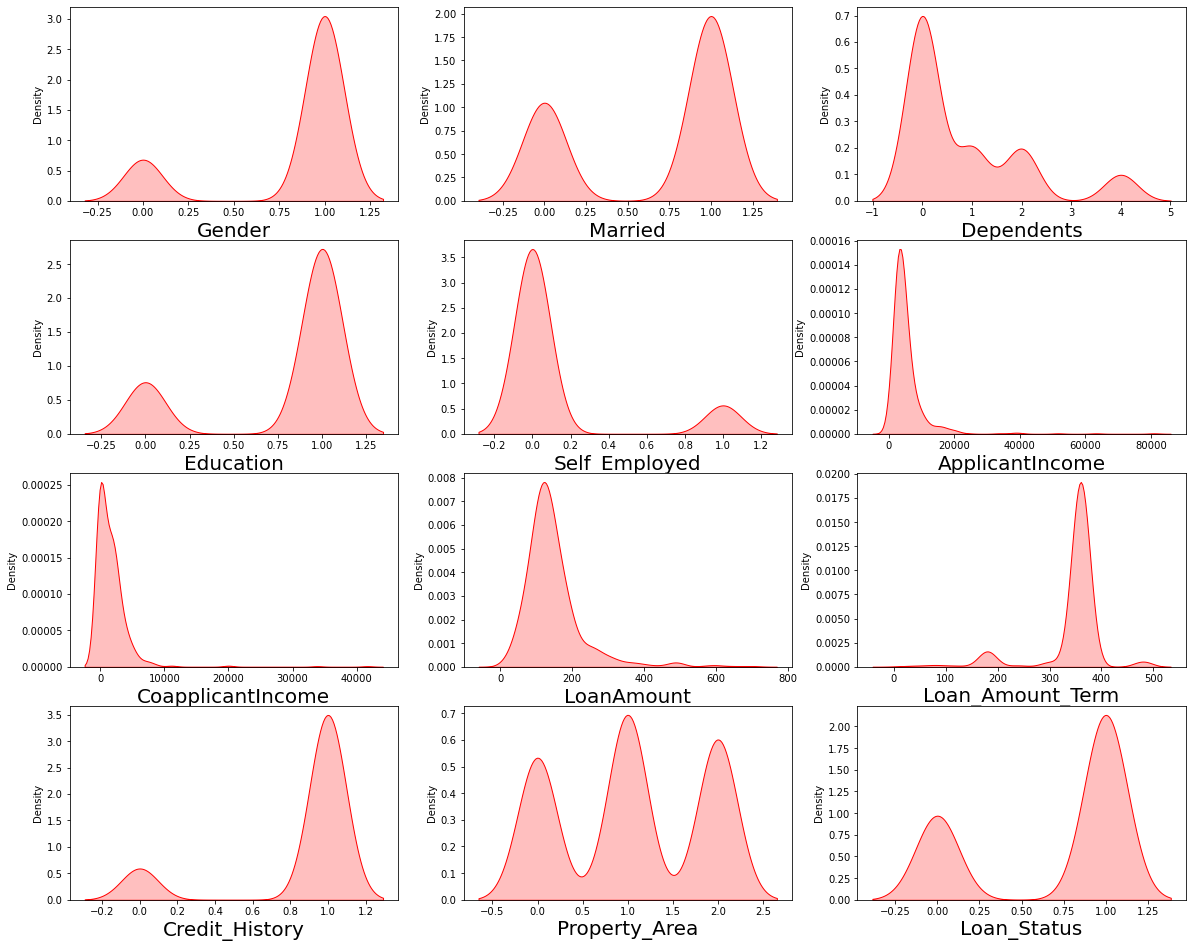

In [33]:
plt.figure(figsize=(20,25), facecolor='white')
plotnumber =1
for column in down_loan:
    if plotnumber<=17:
        ax= plt.subplot(6,3,plotnumber)
        sns.distplot(down_loan[column], color='r',hist=False,kde_kws={"shade": True})
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.show()

In [ ]:
dataLoanApp.skew()

# Checking Correlation

Now lets look at the correlation between all the numerical variables. We can use the corr() to compute pairwise correlation of columns, excluding NA/null values using pearson correlation coefficient. Then we will use the heat map to visualize the correlation. Heatmaps visualize data through variations in coloring. The variables with darker color means their correlation is more.

<AxesSubplot:>

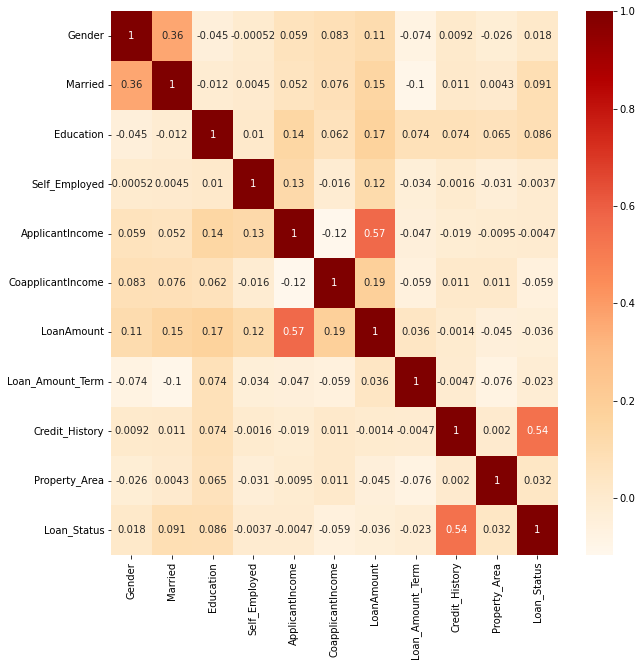

In [34]:
corr_loan= dataLoanApp.corr()
plt.figure(figsize=(10,10))
sns.heatmap(corr_loan, annot=True,cmap='OrRd')

# Machine Learning Model Building

After creating new features, we can continue the model building process. So we will start with logistic regression model and then move over to more complex models like RandomForest and XGBoost.

We will build the following models in this section.

Logistic Regression
Decision Tree
Random Forest
XGBoost
Let’s prepare the data for feeding into the models.

In [35]:
X=down_loan.drop('Loan_Status',axis=1)
Y=down_loan['Loan_Status']

In [36]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

Splitting data

In [37]:
X_train,X_test,Y_train,Y_test =  train_test_split(X,Y,test_size=.30,random_state=42)

In [52]:
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report,f1_score

# General function for train ,test,and predict

In [38]:

def model_val(model,X,Y):
    X_train,X_test,Y_train,Y_test =  train_test_split(X,Y,test_size=.30,random_state=42)
    model.fit( X_train,Y_train)
    y_pred=model.predict(X_test)
    print("Accuracy is ", model.score(X_test,Y_test)*100)
    score= cross_val_score(model,X,Y,cv=5) 
    print("Cross validation score is ", np.mean(score)*100)


# Logistics Regression Model

In [39]:
from sklearn.linear_model import LogisticRegression
model= LogisticRegression()
model_val(model,X,Y)

Accuracy is  78.37837837837837
Cross validation score is  79.31627349060376


# DecisionTreeClassifier

In [59]:
from sklearn.tree import DecisionTreeClassifier
model= DecisionTreeClassifier()
model_val(model,X,Y)
#classification_report(Y_test, y_pred)

Accuracy is  68.10810810810811
Cross validation score is  71.66200186592032


# Decision Tree
Decision tree is a type of supervised learning algorithm(having a pre-defined target variable) that is mostly used in classification problems. In this technique, we split the population or sample into two or more homogeneous sets(or sub-populations) based on most significant splitter / differentiator in input variables.

Decision trees use multiple algorithms to decide to split a node in two or more sub-nodes. The creation of sub-nodes increases the homogeneity of resultant sub-nodes. In other words, we can say that purity of the node increases with respect to the target variable.

# RandomForestClassifier

In [41]:
from sklearn.ensemble import RandomForestClassifier
model= RandomForestClassifier()
model_val(model,X,Y)

Accuracy is  77.83783783783784
Cross validation score is  78.82980141276823


# Random Forest
RandomForest is a tree based bootstrapping algorithm wherein a certain no. of weak learners (decision trees) are combined to make a powerful prediction model.
For every individual learner, a random sample of rows and a few randomly chosen variables are used to build a decision tree model.
Final prediction can be a function of all the predictions made by the individual learners.
In case of regression problem, the final prediction can be mean of all the predictions.

# ExtraTreesClassifier

In [42]:
from sklearn.ensemble import ExtraTreesClassifier
model= ExtraTreesClassifier()
model_val(model,X,Y)

Accuracy is  77.29729729729729
Cross validation score is  75.89497534319605


# SGDClassifier

In [44]:
from sklearn.linear_model import SGDClassifier
model= SGDClassifier()
model_val(model,X,Y)

Accuracy is  65.4054054054054
Cross validation score is  57.447687591630014


# AdaBoostClassifier

In [46]:
from sklearn.ensemble import AdaBoostClassifier
model= AdaBoostClassifier()
model_val(model,X,Y)

Accuracy is  76.21621621621621
Cross validation score is  78.01146208183394


# GradientBoostingClassifier

In [47]:
from sklearn.ensemble import GradientBoostingClassifier
model= GradientBoostingClassifier()
model_val(model,X,Y)

Accuracy is  73.51351351351352
Cross validation score is  77.84886045581766


We can see that RandomForestClassifier() gives us good Accuracy and best Cross-validation score. 

# Hyper Parameter Tuning : GridSearchCV

We will try to improve the accuracy by tuning the hyperparameters for this model. We will use grid search to get the optimized values of hyper parameters. GridSearch is a way to select the best of a family of hyper parameters, parametrized by a grid of parameters.

We will use GridSearchCV in sklearn.model_selection for an exhaustive search over specified parameter values for an estimator. GridSearchCV implements a “fit” and a “score” method. It also implements “predict”, “predict_proba”, “decision_function”, “transform” and “inverse_transform” if they are implemented in the estimator used.

In [63]:
from sklearn.model_selection import GridSearchCV
parameter = {  'bootstrap': [True], 'max_depth': [5, 10,20,40,50,60], 
              'max_features': ['auto', 'log2'], 
              'criterion':['gini','entropy'],
              'n_estimators': [5, 10, 15 ,25,50,60,70]}

In [64]:
GCV = GridSearchCV(RandomForestClassifier(),parameter,verbose=10)
GCV.fit(X_train,Y_train)

Fitting 5 folds for each of 168 candidates, totalling 840 fits
[CV 1/5; 1/168] START bootstrap=True, criterion=gini, max_depth=5, max_features=auto, n_estimators=5
[CV 1/5; 1/168] END bootstrap=True, criterion=gini, max_depth=5, max_features=auto, n_estimators=5;, score=0.849 total time=   0.0s
[CV 2/5; 1/168] START bootstrap=True, criterion=gini, max_depth=5, max_features=auto, n_estimators=5
[CV 2/5; 1/168] END bootstrap=True, criterion=gini, max_depth=5, max_features=auto, n_estimators=5;, score=0.814 total time=   0.0s
[CV 3/5; 1/168] START bootstrap=True, criterion=gini, max_depth=5, max_features=auto, n_estimators=5
[CV 3/5; 1/168] END bootstrap=True, criterion=gini, max_depth=5, max_features=auto, n_estimators=5;, score=0.791 total time=   0.0s
[CV 4/5; 1/168] START bootstrap=True, criterion=gini, max_depth=5, max_features=auto, n_estimators=5
[CV 4/5; 1/168] END bootstrap=True, criterion=gini, max_depth=5, max_features=auto, n_estimators=5;, score=0.779 total time=   0.0s
[CV 5

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'bootstrap': [True], 'criterion': ['gini', 'entropy'],
                         'max_depth': [5, 10, 20, 40, 50, 60],
                         'max_features': ['auto', 'log2'],
                         'n_estimators': [5, 10, 15, 25, 50, 60, 70]},
             verbose=10)

In [65]:
GCV.best_params_

{'bootstrap': True,
 'criterion': 'entropy',
 'max_depth': 50,
 'max_features': 'log2',
 'n_estimators': 60}

In [50]:
model=RandomForestClassifier(n_estimators=60,criterion='entropy', bootstrap= True, max_depth=50, max_features=log2)
model_val(model,X,Y)

Accuracy is  78.37837837837837
Cross validation score is  80.78368652538984


# Final Model

In [60]:
Final_mod = RandomForestClassifier(bootstrap=True,criterion='entropy',n_estimators= 60, max_depth=50 ,max_features=log2)
Final_mod.fit(X_train,Y_train)
y_pred=Final_mod.predict(X_test)
print('\033[1m'+'Accuracy Score :'+'\033[0m\n', accuracy_score(Y_test, y_pred))

Accuracy Score :
 0.7567567567567568


# Saving model

In [62]:
import joblib
joblib.dump(Final_mod,'Loan_Status.pkl')

['Loan_Status.pkl']

# Conclusion
After trying and testing 4 different algorithms, the best accuracy on the public leaderboard is achieved by RandomForestClassifier (0.7567) and SGDClassifier performed the worst (65.40). While new features created via feature engineering helped in predicting the target variable, it did not improve the overall model accuracy much. Compared to using default parameter values, GridSearchCV helped improved the model's mean validation accuracy by providing the optimized values for the model's hyperparameters. On the whole, a RandomForestClassifier provides the best result in terms of accuracy for the given dataset, without any feature engineering needed. Because of its simplicity and the fact that it can be implemented relatively easy and quick, RandomForestClassifier is often a good baseline that data scientists can use to measure the performance of other more complex algorithms. 



# Suggestions for Improvement as per my understanding and exploration from youtube and websites. 
There are many things that can be tried to improve the models’ predictions. We can create and add more variables, try different models with different subset of features and/or rows, etc. Some of the ideas are listed below:

Combine the applicants with 1,2,3 or more dependents and make a new feature as discussed in the EDA part.
Make independent vs independent variable visualizations to discover some more patterns.
Arrive at the EMI using a better formula which may include interest rates as well.
Try ensemble modeling (combination of different models). More about ensemble techniques can be found at the references.
Try neural network using Tensorflow or PyTorch